In [2]:
import pandas as pd

df = pd.read_json("../../data/example00593.json", orient='series')
df = df.set_index('date')

s_data = df.tail(620)
lows = s_data['low']
highs = s_data['high']

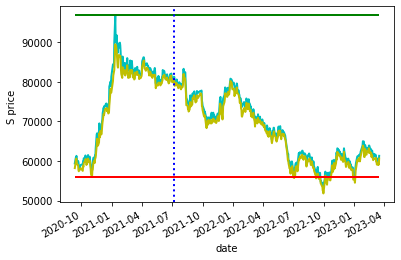

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='S price ')
highs.plot(ax=ax1, color='c', lw=2.)
lows.plot(ax=ax1, color='y', lw=2.)
plt.hlines(highs.head(200).max(), lows.index.values[0], lows.index.values[-1], linewidth=2, color='g')
plt.hlines(lows.head(200).min(), lows.index.values[0], lows.index.values[-1], linewidth=2, color='r')
plt.axvline(linewidth=2, color='b', x=lows.index.values[200], linestyle=':')
plt.show()

In [4]:
import numpy as np

s_data_signal = s_data
s_data_signal['price'] = s_data_signal['close']

C:\Users\samdasu\AppData\Local\Temp\ipykernel_23504\1855954453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_data_signal['price'] = s_data_signal['close']


In [ ]:
def trading_support_resistance(data, bin_width=20):
    result = data.copy()
    result['sup_tolerance'] = pd.Series(np.zeros(len(data)))
    result['res_tolerance'] = pd.Series(np.zeros(len(data)))
    result['sup_count'] = pd.Series(np.zeros(len(data)))
    result['res_count'] = pd.Series(np.zeros(len(data)))
    result['sup'] = pd.Series(np.zeros(len(data)))
    result['res'] = pd.Series(np.zeros(len(data)))
    result['positions'] = pd.Series(np.zeros(len(data)))
    result['signal'] = pd.Series(np.zeros(len(data)))
    
    in_support = 0
    in_resistance = 0
    for x in range((bin_width -1) + bin_width, len(data)):
        data_section = result[x - bin_width:x +1]
        support_level = min(data_section['price'])
        resistance_level = max(data_section['price'])
        range_level = resistance_level-support_level
        #result['res'][x] = resistance_level
        result.iloc[x, result.columns.get_loc('res')] = resistance_level
        #result['sup'][x] = support_level
        result.iloc[x, result.columns.get_loc('sup')] = support_level
        #result['sup_tolerance'][x] = support_level + 0.2 * range_level
        result.iloc[x, result.columns.get_loc('sup_tolerance')] = support_level + 0.2 * range_level
        #result['res_tolerance'][x] = resistance_level - 0.2 * range_level
        result.iloc[x, result.columns.get_loc('res_tolerance')] = resistance_level - 0.2 * range_level
        #print(support_level)
        #print(result.iloc[x]['res_tolerance'])
        if result.iloc[x]['price'] >= result.iloc[x]['res_tolerance'] and result.iloc[x]['price'] <= result.iloc[x]['res']:
        #if result['price'][x] >= result['res_tolerance'][x] and result['price'][x] <= data['res'][x]:
            in_resistance += 1
            #result.iloc[x]['res_count'] = in_resistance
            result.iloc[x, result.columns.get_loc('res_count')] = in_resistance
        elif result.iloc[x]['price'] <= result.iloc[x]['sup_tolerance'] and result.iloc[x]['price'] >= result.iloc[x]['sup']:
            in_support += 1
            result.iloc[x, result.columns.get_loc('sup_count')] = in_support
        else:
            in_support = 0
            in_resistance = 0
        if in_resistance > 2:
            result.iloc[x, result.columns.get_loc('signal')] = 1
        elif in_support > 2:
            result.iloc[x, result.columns.get_loc('signal')] = 0
        else:
            result.iloc[x, result.columns.get_loc('signal')] = result.iloc[x-1]['signal']
    result['positions'] = result['signal'].diff()
    return result
        
        
s_data_signal = trading_support_resistance(s_data)

In [51]:
s_data_signal.tail(20)

,open,high,low,close,volume,price,sup_tolerance,res_tolerance,sup_count,res_count,sup,res,positions,signal
date,,,,,,,,,,,,,,
2023-02-17,62900,63300,62400,62600,10791265,62600,61240.0,63760.0,NaN,NaN,60400.0,64600.0,NaN,NaN
2023-02-20,62900,63000,61800,62700,12908073,62700,61720.0,63880.0,NaN,NaN,61000.0,64600.0,NaN,NaN
2023-02-21,62700,62800,62000,62100,7665046,62100,61720.0,63880.0,NaN,NaN,61000.0,64600.0,NaN,NaN
2023-02-22,61500,61800,61000,61100,11959088,61100,61720.0,63880.0,1.0,NaN,61000.0,64600.0,NaN,NaN
2023-02-23,61700,62500,61500,62000,13047099,62000,61720.0,63880.0,NaN,NaN,61000.0,64600.0,NaN,NaN
2023-02-24,62300,62600,61300,61300,10308143,61300,61720.0,63880.0,1.0,NaN,61000.0,64600.0,NaN,NaN
2023-02-27,60800,60800,60200,60500,11155697,60500,61160.0,63140.0,2.0,NaN,60500.0,63800.0,NaN,NaN
2023-02-28,60800,61400,60500,60600,13715861,60600,61160.0,63140.0,3.0,NaN,60500.0,63800.0,NaN,0.0
2023-03-02,60900,61800,60500,60800,13095682,60800,61160.0,63140.0,4.0,NaN,60500.0,63800.0,0.0,0.0


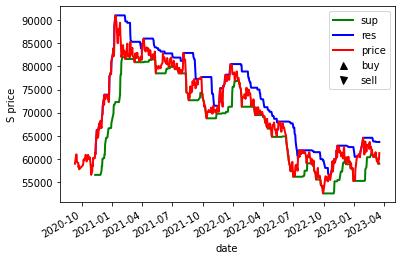

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='S price')
s_data_signal['sup'].plot(ax=ax1, color='g', lw=2.)
s_data_signal['res'].plot(ax=ax1, color='b', lw=2.)
s_data_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(s_data_signal.loc[s_data_signal.positions == 1.0].index, 
         s_data_signal.price[s_data_signal.positions == 1.0], '^', markersize=7, color='k', label='buy')
ax1.plot(s_data_signal.loc[s_data_signal.positions == -1.0].index,
         s_data_signal.price[s_data_signal.positions == -1.0], 'v', markersize=7, color='k', label='sell')
plt.legend()
plt.show()